(1) 주어진 방정식을 first-order forward difference in time 그리고 second-order central difference in space(FTCS scheme)으로 계산하시오. 속도 profile은 nt = 0, π/2, π, 3π/2,2π 일 때에 대하여 그리시오. 또한, quasi-steady state velocity profile을 (nt - T) = 0, π/2, π, 3π/2,2π 에 대하여 구하시오. T는 일종의 quasi-steady state 해를 얻기 위한 transient period로서 T = 10π 로 주어진다.

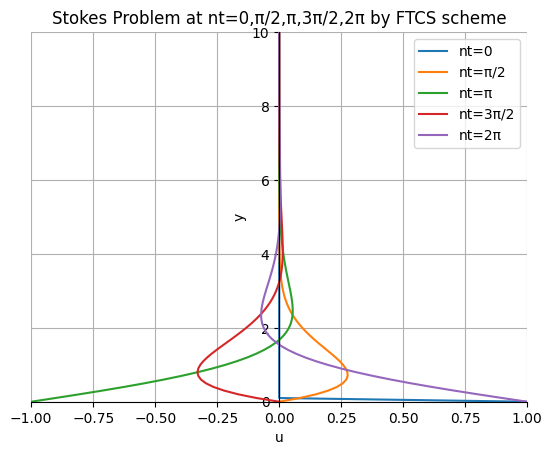

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

Sv=1
n=2
U0=1
L=10
T=2*np.pi
t=0

dy=0.1
n_y=101
dt=T/2000
y=np.linspace(0,L,n_y)

u_n=np.zeros(n_y)
u_n[0]=U0*np.cos(n*t)
u_profile=[u_n.copy()]


for i in range(8000):
    t=i*dt
    u_n1=np.zeros(n_y)
    u_n1[0]=U0*np.cos(n*t)
    u_n1[-1]=0
    for j in range(1, n_y-1):
        u_n1[j]=u_n[j]+(v*dt/dy**2)*(u_n[j+1]-2*u_n[j]+u_n[j-1])
    u_n=u_n1
    for k in [0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi, 10*np.pi, 10.5*np.pi, 11*np.pi, 11.5*np.pi, 12*np.pi]:
        if np.abs(t-k/n)<dt/2:
            u_profile.append(u_n1.copy())


# FTCS scheme at nt=0, π/2, π, 3π/2, 2π

fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_profile[0], y, label='nt=0')
ax.plot(u_profile[1], y, label='nt=π/2')
ax.plot(u_profile[2], y, label='nt=π')
ax.plot(u_profile[3], y, label='nt=3π/2')
ax.plot(u_profile[4], y, label='nt=2π')

ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem at nt=0,π/2,π,3π/2,2π by FTCS scheme')
plt.show()

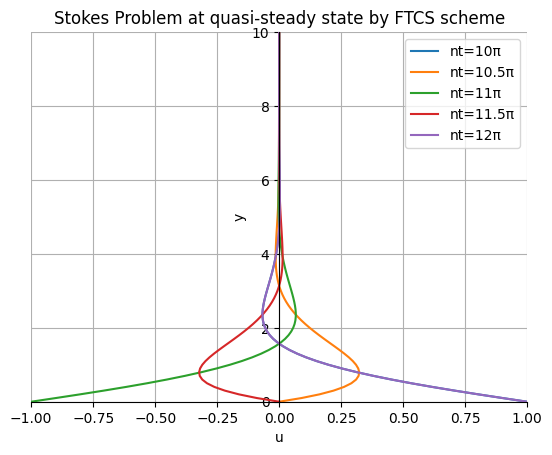

In [2]:

# FTCS scheme at quasti-steady state (at nt=10π, 10.5π, 11π, 11.5π, 12π)

fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_profile[5], y, label='nt=10π')
ax.plot(u_profile[6], y, label='nt=10.5π')
ax.plot(u_profile[7], y, label='nt=11π')
ax.plot(u_profile[8], y, label='nt=11.5π')
ax.plot(u_profile[9], y, label='nt=12π')

ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem at quasi-steady state by FTCS scheme')
plt.show()


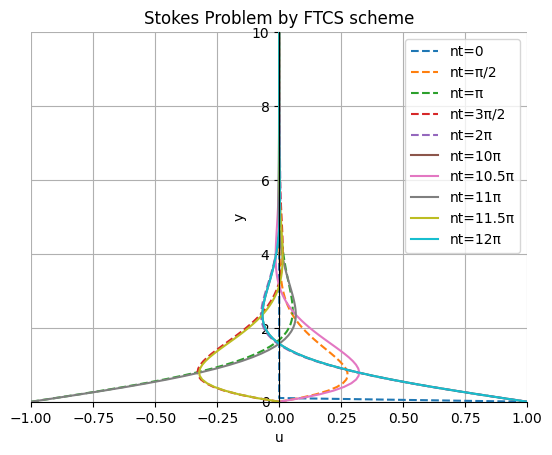

In [3]:
# 두 그래프 함께 그리기
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_profile[0], y, linestyle='--', label='nt=0')
ax.plot(u_profile[1], y, linestyle='--', label='nt=π/2')
ax.plot(u_profile[2], y, linestyle='--', label='nt=π')
ax.plot(u_profile[3], y, linestyle='--', label='nt=3π/2')
ax.plot(u_profile[4], y, linestyle='--', label='nt=2π')
ax.plot(u_profile[5], y, label='nt=10π')
ax.plot(u_profile[6], y, label='nt=10.5π')
ax.plot(u_profile[7], y, label='nt=11π')
ax.plot(u_profile[8], y, label='nt=11.5π')
ax.plot(u_profile[9], y, label='nt=12π')

ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem by FTCS scheme')
plt.show()

(2) 위 문제를 시간에 대하여 Crank-Nicolson scheme을 사용하여 계산하시오

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

v=1
n=2
U0=1
L=10
T=2*np.pi
dy=0.1
n_y=101
dt=T/2000
y=np.linspace(0,L,n_y)

a=v*dt/(2*dy**2)
M=np.zeros((n_y-2, n_y-2))
for i in range(n_y-3):
    M[i][i]=1+2*a
    M[i+1][i]=-a
    M[i][i+1]=-a
M[n_y-3][n_y-3]=1+2*a

t=0
u_n=np.zeros(n_y)
u_n1=np.zeros(n_y)
u_profile=np.zeros(n_y)
u_profile[0]=U0*np.cos(n*t)
u_profile=[u_profile]


for k in range(2000):
    t+=dt
    u_n1[0]=U0*np.cos(n*t+dt)
    u_n1[-1]=0
    u_ex=np.zeros(n_y-2)
    for i in range(n_y-2):
        u_ex[i]=a*u_n[i]+(1-2*a)*u_n[i+1]+a*u_n[i+2]
    u_ex[0]+=a*U0*np.cos(n*t)
    u_n1[1:-1]=np.linalg.solve(M, u_ex)
    for l in [0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi, 
              10*np.pi, 10.5*np.pi, 11*np.pi, 11.5*np.pi, 12*np.pi]:
        if np.abs(t-l/n)<dt/2:
            u_n1_bc=u_n1.copy()
            u_profile.append(u_n1_bc.copy())
    u_n[...]=u_n1[...]

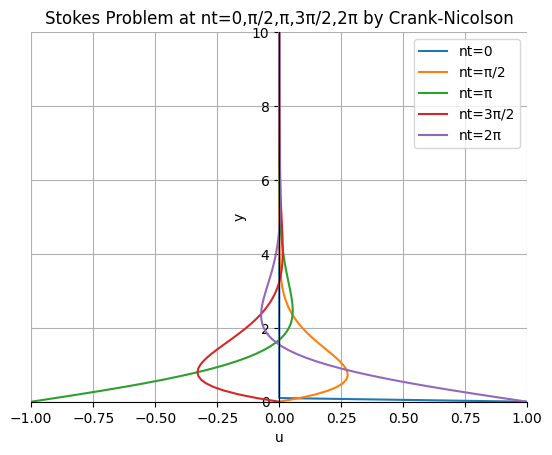

In [4]:
# Crank-Nocolson scheme at nt=0, π/2, π, 3π/2, 2π

fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_profile[0], y, label='nt=0')
ax.plot(u_profile[1], y, label='nt=π/2')
ax.plot(u_profile[2], y, label='nt=π')
ax.plot(u_profile[3], y, label='nt=3π/2')
ax.plot(u_profile[4], y, label='nt=2π')

ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem at nt=0,π/2,π,3π/2,2π by Crank-Nicolson')
plt.show()

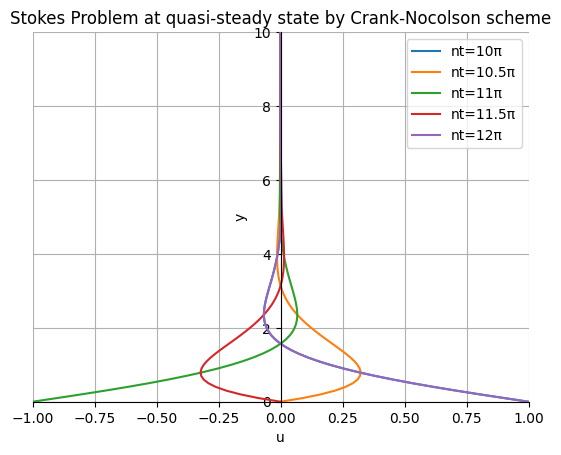

In [5]:
# Crank-Nocolson scheme at quasti-steady state (at nt=10π, 10.5π, 11π, 11.5π, 12π)

fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_profile[5], y, label='nt=10π')
ax.plot(u_profile[6], y, label='nt=10.5π')
ax.plot(u_profile[7], y, label='nt=11π')
ax.plot(u_profile[8], y, label='nt=11.5π')
ax.plot(u_profile[9], y, label='nt=12π')

ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem at quasi-steady state by Crank-Nocolson scheme')
plt.show()

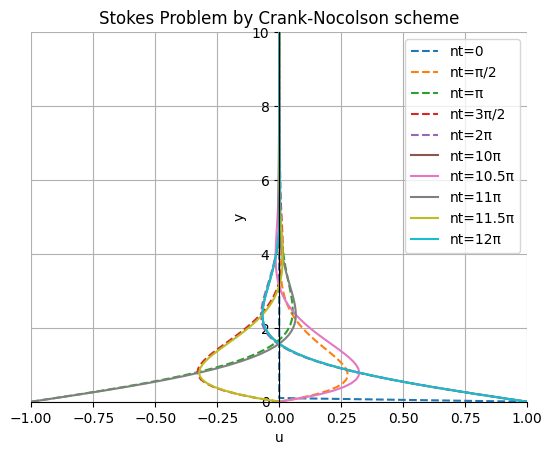

In [6]:
# 두 그래프 함께 그리기
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_profile[0], y, linestyle='--', label='nt=0')
ax.plot(u_profile[1], y, linestyle='--', label='nt=π/2')
ax.plot(u_profile[2], y, linestyle='--', label='nt=π')
ax.plot(u_profile[3], y, linestyle='--', label='nt=3π/2')
ax.plot(u_profile[4], y, linestyle='--', label='nt=2π')
ax.plot(u_profile[5], y, label='nt=10π')
ax.plot(u_profile[6], y, label='nt=10.5π')
ax.plot(u_profile[7], y, label='nt=11π')
ax.plot(u_profile[8], y, label='nt=11.5π')
ax.plot(u_profile[9], y, label='nt=12π')

ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem by Crank-Nocolson scheme')
plt.show()

(3) 각각 다른 두개의 scheme에 대하여 시간의 변화에 따른 해의 수렴율을 구하시오 (log(∆t) vs
log (l2norm)). FTCS는 시간에 대한 1차, Crank-Nicolson은 2차의 수렴율을 보여야 하며, 오차계산
에 사용되는 exact solution은 uሺy, tሻ ൌ U଴eିఎೞ cosሺnt െ η௦ሻ , where η௦ ൌ ට n
2ν y. 을 사용하여 구하시오.

In [17]:
#FTCS의 error

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import linregress

def u_exact(y, t):
    n_s=math.sqrt(n/(2*v))*y
    return U0*np.exp(-n_s)*np.cos(n*t-n_s)


v=1
n=2
U0=1
L=10
T=2*np.pi
t=0

dy=0.1
n_y=101
y=np.linspace(0,L,n_y)
error_FTCS=[]

u_n=np.zeros(n_y)
dt_list=[]

for k in range(1300, 1400, 5):
    dt=T/k
    dt_list.append(dt)
    u_profile=np.zeros(n_y)
    u_profile[0]=U0*np.cos(n*t)
    u_profile=[u_profile]
    u_n[0]=U0*np.cos(n*t)
    u_ex=[u_exact(y, 0)]
    for i in range(5*k):
        t=i*dt
        u_n1=np.zeros(n_y)
        u_n1[0]=U0*np.cos(n*t)
        u_n1[-1]=0
        for j in range(1, n_y-1):
            u_n1[j]=u_n[j]+(v*dt/dy**2)*(u_n[j+1]-2*u_n[j]+u_n[j-1])
        u_n=u_n1
        u_profile.append(u_n1.copy())
        u_ex_t=u_exact(y, t)
        u_ex.append(u_ex_t)
    error_FTCS.append(np.linalg.norm(u_profile[-1]-u_ex[-1], 2)*np.sqrt(dy))

6976 6976


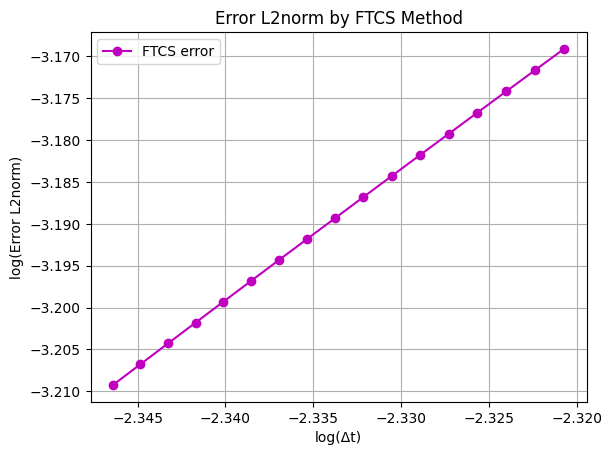

order of accuracy: 1.564693767112058


In [ ]:
# error 그래프 그리기

# print(len(dt_list), len(error_FTCS))
# print(dt_list)
# print(len(u_profile), len(u_ex))

dt_list=dt_list[3:]
error_FTCS=error_FTCS[3:]

plt.plot(np.log10(dt_list), np.log10(error_FTCS), marker='o', color='m', label='FTCS error')
plt.xlabel('log(Δt)')
plt.ylabel('log(Error L2norm)')
plt.title('Error L2norm by FTCS Method')
plt.grid()
plt.legend()
plt.show()

print(f'order of accuracy: {linregress(np.log10(dt_list), np.log10(error_FTCS)).slope}')

In [19]:
#Crank-Nicolson의 error

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import linregress

def u_exact(y, t):
    n_s=math.sqrt(n/(2*v))*y
    return U0*np.exp(-n_s)*np.cos(n*t-n_s)

v=1
n=2
U0=1
L=10
T=2*np.pi
dy=0.01
n_y=1001
dt=T/2000
y=np.linspace(0,L,n_y)
dt_list=[]
t=0
u_n=np.zeros(n_y)
u_n1=np.zeros(n_y)
error_CN=[]


for k in range(50, 1000, 50):
    dt=T/k
    dt_list.append(dt)
    u_profile=np.zeros(n_y)
    u_profile[0]=U0*np.cos(n*t)
    u_profile=[u_profile]
    u_n[0]=U0*np.cos(n*t)
    u_ex=[u_exact(y, 0)]
    a=v*dt/(2*dy**2)
    M=np.zeros((n_y-2, n_y-2))
    for i in range(n_y-3):
        M[i][i]=1+2*a
        M[i+1][i]=-a
        M[i][i+1]=-a
    M[n_y-3][n_y-3]=1+2*a
    for l in range(3*k):
        t+=dt
        u_n1[0]=U0*np.cos(n*t+dt)
        u_n1[-1]=0
        u_example=np.zeros(n_y-2)
        for i in range(n_y-2):
            u_example[i]=a*u_n[i]+(1-2*a)*u_n[i+1]+a*u_n[i+2]
        u_example[0]+=a*U0*np.cos(n*t)
        u_n1[1:-1]=np.linalg.solve(M, u_example)
        u_n1_bc=u_n1.copy()
        u_profile.append(u_n1_bc.copy())
        u_n[...]=u_n1[...]
        u_ex_t=u_exact(y, t)
        u_ex.append(u_ex_t)
    error_CN.append(np.linalg.norm(u_profile[3*k]-u_ex[3*k], 2)*np.sqrt(dy))


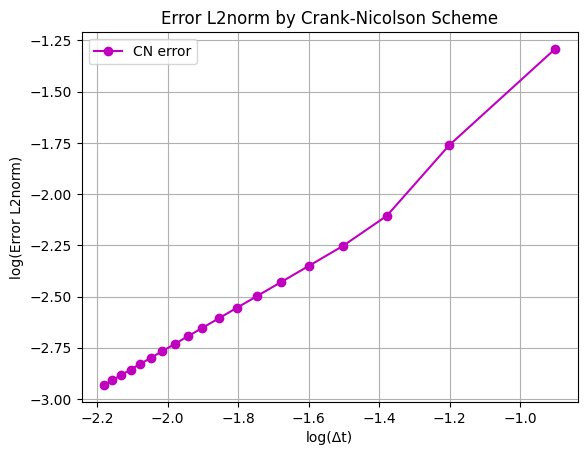

order of accuracy: 1.2029220799363685


In [20]:
# error 그래프 그리기

# print(len(u_profile), len(u_ex))

plt.plot(np.log10(dt_list), np.log10(error_CN), marker='o', color='m', label='CN error')
plt.xlabel('log(Δt)')
plt.ylabel('log(Error L2norm)')
plt.title('Error L2norm by Crank-Nicolson Scheme')
plt.grid()
plt.legend()
plt.show()

print(f'order of accuracy: {linregress(np.log10(dt_list), np.log10(error_CN)).slope}')

(4) (2)번 문제를 L=2의 조건에 대하여 다시 진행하고, 두 평판의 거리가 속도 profile에 미치는 영향을 서술하시오.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

v=1
n=2
U0=1
L=2
T=2*np.pi
dy=0.1
n_y=21
dt=T/2000
y=np.linspace(0,L,n_y)

a=v*dt/(2*dy**2)
M=np.zeros((n_y-2, n_y-2))
for i in range(n_y-3):
    M[i][i]=1+2*a
    M[i+1][i]=-a
    M[i][i+1]=-a
M[n_y-3][n_y-3]=1+2*a

t=0
u_n=np.zeros(n_y)
u_n1=np.zeros(n_y)
u_profile=np.zeros(n_y)
u_profile[0]=U0*np.cos(n*t)
u_profile=[u_profile]


for k in range(12000):
    t+=dt
    u_n1[0]=U0*np.cos(n*t+dt)
    u_n1[-1]=0
    u_ex=np.zeros(n_y-2)
    for i in range(n_y-2):
        u_ex[i]=a*u_n[i]+(1-2*a)*u_n[i+1]+a*u_n[i+2]
    u_ex[0]+=a*U0*np.cos(n*t)
    u_n1[1:-1]=np.linalg.solve(M, u_ex)
    for l in [0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi, 10*np.pi, 10.5*np.pi, 11*np.pi, 11.5*np.pi, 12*np.pi]:
        if np.abs(t-l/n)<dt/2:
            u_n1_bc=u_n1.copy()
            u_profile.append(u_n1_bc.copy())
    u_n[...]=u_n1[...]

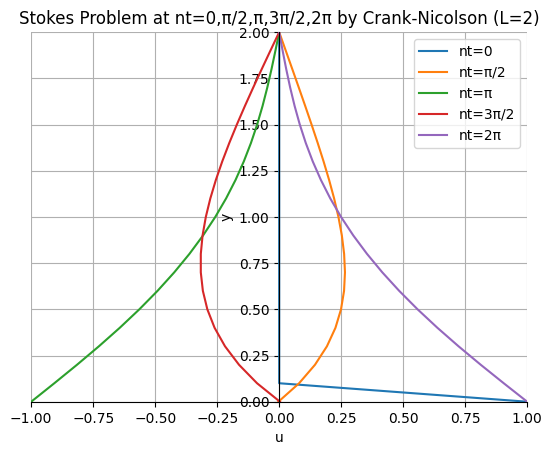

In [8]:
# Crank-Nocolson scheme at nt=0, π/2, π, 3π/2, 2π

fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_profile[0], y, label='nt=0')
ax.plot(u_profile[1], y, label='nt=π/2')
ax.plot(u_profile[2], y, label='nt=π')
ax.plot(u_profile[3], y, label='nt=3π/2')
ax.plot(u_profile[4], y, label='nt=2π')

ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem at nt=0,π/2,π,3π/2,2π by Crank-Nicolson (L=2)')
plt.show()

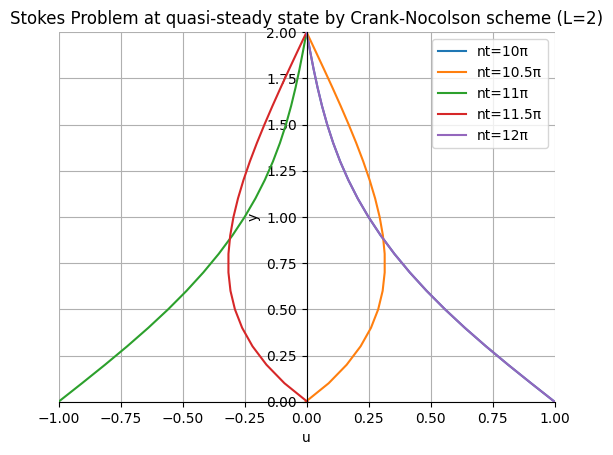

In [11]:
# Crank-Nocolson scheme at quasti-steady state (at nt=10π, 10.5π, 11π, 11.5π, 12π)

fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_profile[5], y, label='nt=10π')
ax.plot(u_profile[6], y, label='nt=10.5π')
ax.plot(u_profile[7], y, label='nt=11π')
ax.plot(u_profile[8], y, label='nt=11.5π')
ax.plot(u_profile[9], y, label='nt=12π')

ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem at quasi-steady state by Crank-Nocolson scheme (L=2)')
plt.show()

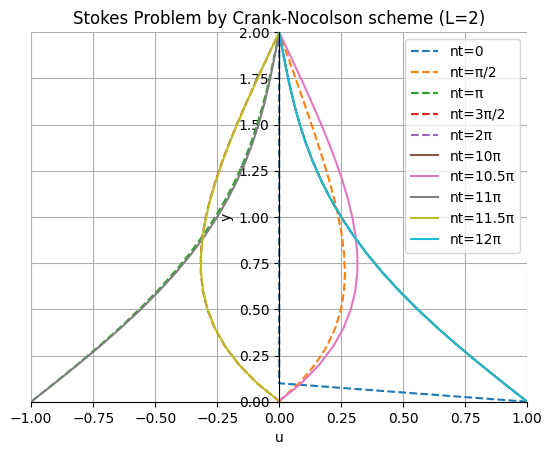

In [13]:
# 두 그래프 함께 그리기
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)
ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))

ax.plot(u_profile[0], y, linestyle='--', label='nt=0')
ax.plot(u_profile[1], y, linestyle='--', label='nt=π/2')
ax.plot(u_profile[2], y, linestyle='--', label='nt=π')
ax.plot(u_profile[3], y, linestyle='--', label='nt=3π/2')
ax.plot(u_profile[4], y, linestyle='--', label='nt=2π')
ax.plot(u_profile[5], y, label='nt=10π')
ax.plot(u_profile[6], y, label='nt=10.5π')
ax.plot(u_profile[7], y, label='nt=11π')
ax.plot(u_profile[8], y, label='nt=11.5π')
ax.plot(u_profile[9], y, label='nt=12π')

ax.set_xlabel('u')
ax.set_ylabel('y')
ax.legend()
plt.grid()
ax.set_title('Stokes Problem by Crank-Nocolson scheme (L=2)')
plt.show()